## EDA

The main goal is to perform Exploratory Data Analysis (EDA) and to assess data quality and integrity and also better understand the data structure. 

It provided the following understand of the variables:
 - stone_tpv_acquirer_total: Total Volumetric Payments (TPV)
 - cnae_fiscal_principal: Main CNAE code
 - segmento: Market segment
 - uf: UF
 - municipio: City
 - bairro: Neighborhood
 - mei: Dummy for "is MEI?"
 - capital_social: Value for social capital
 - total_estab: Establishments linked to the customer
 - mcc: MCC products code
 - subsegmento: Market subsegment
 - porte: Company size
 - faixa_empregados: Range of employees
 - tier: Class of clients

##### Imports and configuration

In [1]:
# Imports
import sys
import pandas as pd
from dotenv import load_dotenv 

sys.path.append('../')
load_dotenv()

from functions.eda import (
    describe_data,
    distribution_graphs,
    calculate_unique_values
)

# Configuration
pd.set_option('display.max_rows', 100)

##### Data preparation

In [2]:
# Load data
data = pd.read_csv('../test_data/data.csv')
# data

In [3]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   stone_tpv_acquirer_total  100000 non-null  float64
 1   cnae_fiscal_principal     100000 non-null  int64  
 2   segmento                  100000 non-null  int64  
 3   uf                        100000 non-null  object 
 4   municipio                 100000 non-null  object 
 5   bairro                    99945 non-null   object 
 6   mei                       100000 non-null  int64  
 7   capital_social            100000 non-null  int64  
 8   total_estab               100000 non-null  int64  
 9   mcc                       100000 non-null  int64  
 10  subsegmento               100000 non-null  int64  
 11  porte                     100000 non-null  int64  
 12  faixa_empregados          100000 non-null  int64  
 13  tier                      100000 non-null  in

In [4]:
# Data check
# data[50000:50100]
# data.head(100)
# data.tail(100)

#### EDA

In [5]:
# Display described data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
describe_data(data)

,count,mean,std,min,25%,50%,75%,max,unique,top,freq,missing_values
stone_tpv_acquirer_total,100000.00,39320.34,95834.59,0.01,6235.01,17434.74,41321.61,9932115.55,NaN,NaN,NaN,0
cnae_fiscal_principal,100000.00,315.58,92.04,0.00,282.00,330.00,362.00,499.00,NaN,NaN,NaN,0
segmento,100000.00,10.41,9.61,0.00,0.00,9.00,19.00,27.00,NaN,NaN,NaN,0
uf,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,SP,23289,0
municipio,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3820,SAO PAULO,6318,0
bairro,99945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16537,CENTRO,26668,55
mei,100000.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00,NaN,NaN,NaN,0
capital_social,100000.00,2458881.78,92900040.41,0.00,5000.00,20000.00,60000.00,4704202922.00,NaN,NaN,NaN,0
total_estab,100000.00,1.68,12.24,1.00,1.00,1.00,1.00,2072.00,NaN,NaN,NaN,0
mcc,100000.00,81.26,33.63,0.00,59.00,79.00,99.00,169.00,NaN,NaN,NaN,0


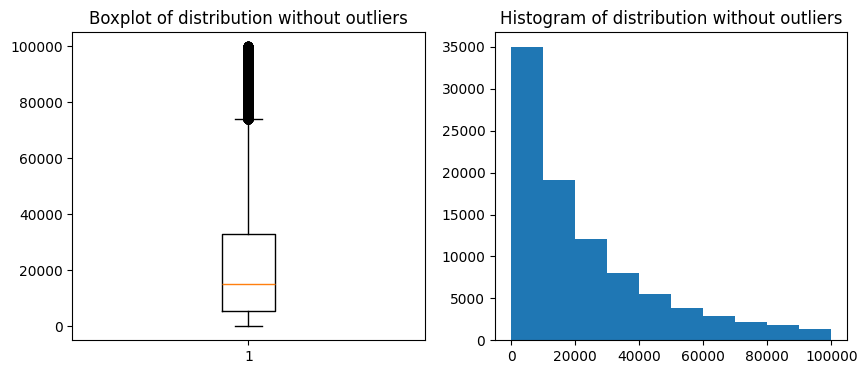

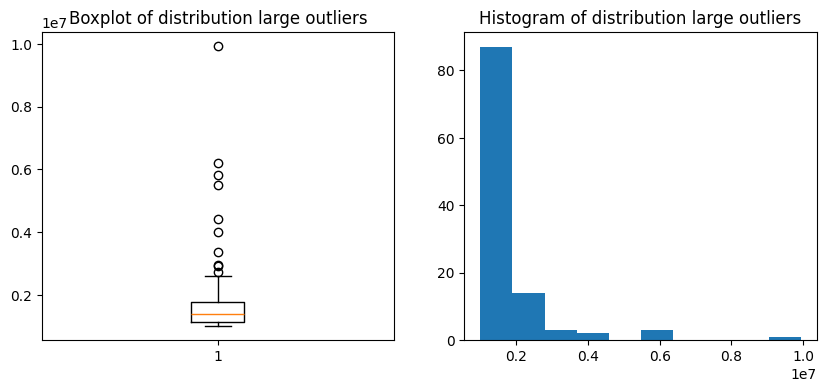

In [6]:
# Checks for distributions graphs
mode = ['above', 'below']
threshold_low = 100000
threshold_high = 1000000

distribution_graphs(data['stone_tpv_acquirer_total'], threshold=threshold_low, mode=mode[1])
distribution_graphs(data['stone_tpv_acquirer_total'], threshold=threshold_high, mode=mode[0])

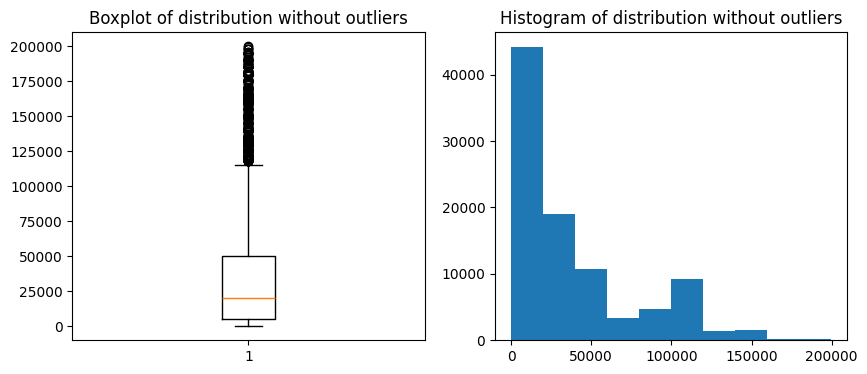

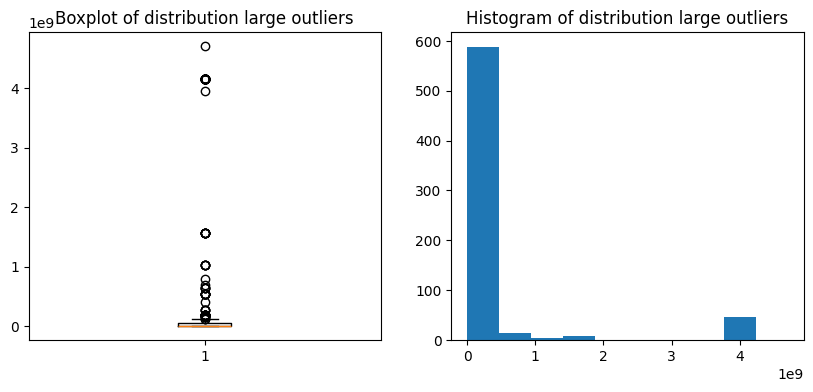

In [7]:
# Checks for distributions graphs

mode = ['above', 'below']
threshold_low = 200000
threshold_high = 2000000

distribution_graphs(data['capital_social'], threshold=threshold_low, mode=mode[1])
distribution_graphs(data['capital_social'], threshold=threshold_high, mode=mode[0])

In [8]:
# Check for unique values and proportions

categories_list = ['cnae_fiscal_principal','segmento','uf','mei','total_estab','mcc','subsegmento','porte','faixa_empregados','tier']
calculate_unique_values(data,categories_list[-1])

,Value,Frequency,Percentage,TPV Proportion
0,2,48318,48.32,43.33
1,0,38202,38.20,11.07
2,1,12896,12.90,40.13
3,3,481,0.48,4.31
4,4,103,0.10,1.16
